# Import Libraries

In [2]:
import sys #access to system parameters https://docs.python.org/3/library/sys.html
import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
import matplotlib #collection of functions for scientific and publication-ready visualization
import numpy as np #foundational package for scientific computing
import scipy as sp #collection of functions for scientific computing and advance mathematics
import IPython 
from IPython import display #pretty printing of dataframes in Jupyter notebook
import sklearn #collection of machine learning algorithms

#misc libraries
import random
import time


#ignore warnings
import warnings


In [1]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
#from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, LabelBinarizer
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
#from pandas.tools.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation

In [44]:
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier
# model tuning
#from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval

# Load Data Modelling Libraries

In [5]:
data_raw = pd.read_csv('input/train.csv')
data_val  = pd.read_csv('input/test.csv')
data1 = data_raw.copy(deep = True)
#however passing by reference is convenient, because we can clean both datasets at once
data_cleaner = [data1, data_val]
#preview data
print (data_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [6]:
data_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# The 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting

In [7]:
print('Train columns with null values:\n', data1.isnull().sum())
print("-"*10)

print('Test/Validation columns with null values:\n', data_val.isnull().sum())
print("-"*10)

data_raw.describe(include = 'all')

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Test/Validation columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Jalsevac, Mr. Ivan",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
# Clean data

for dataset in data_cleaner:    
    #complete missing age with median
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

In [9]:
#complete embarked with mode
dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

In [10]:
    #complete missing fare with median
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)

In [11]:
#delete the cabin feature/column and others previously stated to exclude in train dataset
drop_column = ['PassengerId','Cabin', 'Ticket']
data1.drop(drop_column, axis=1, inplace = True)

In [12]:
print(data1.isnull().sum())
print("-"*10)
print(data_val.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64
----------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [13]:
data1['Embarked'].isnull().sum()

2

In [14]:
#complete embarked with mode
data1['Embarked'].fillna(data1['Embarked'].mode()[0], inplace = True)

In [15]:
print(data1.isnull().sum())
print("-"*10)
print(data_val.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [16]:
###CREATE: Feature Engineering for train and test/validation dataset
for dataset in data_cleaner:    
    #Discrete variables
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1

    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

    #quick and dirty code split title from name: http://www.pythonforbeginners.com/dictionary/python-split
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]


    #Continuous variable bins; qcut vs cut: https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut
    #Fare Bins/Buckets using qcut or frequency bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)

    #Age Bins/Buckets using cut or value bins: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)


C:\Program Files\Anaconda\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Program Files\Anaconda\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [17]:
#cleanup rare title names
#print(data1['Title'].value_counts())
stat_min = 10 #while small is arbitrary, we'll use the common minimum in statistics: http://nicholasjjackson.com/2012/03/08/sample-size-is-10-a-magic-number/
title_names = (data1['Title'].value_counts() < stat_min) #this will create a true false series with title name as index

#apply and lambda functions are quick and dirty code to find and replace with fewer lines of code: https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/
data1['Title'] = data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(data1['Title'].value_counts())
print("-"*10)

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64
----------


In [18]:
#preview data again
data1.info()
data_val.info()
data1.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null object
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null object
FamilySize    891 non-null int64
IsAlone       891 non-null int64
Title         891 non-null object
FareBin       891 non-null category
AgeBin        891 non-null category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null in

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
125,1,3,"Nicola-Yarred, Master. Elias",male,12.0,1,0,11.2417,C,2,0,Master,"(7.91, 14.454]","(-0.08, 16.0]"
404,0,3,"Oreskovic, Miss. Marija",female,20.0,0,0,8.6625,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]"
519,0,3,"Pavlovic, Mr. Stefo",male,32.0,0,0,7.8958,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
660,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,133.6500,S,3,0,Misc,"(31.0, 512.329]","(48.0, 64.0]"
467,0,1,"Smart, Mr. John Montgomery",male,56.0,0,0,26.5500,S,1,1,Mr,"(14.454, 31.0]","(48.0, 64.0]"
177,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,28.7125,C,1,1,Miss,"(14.454, 31.0]","(48.0, 64.0]"
674,0,2,"Watson, Mr. Ennis Hastings",male,28.0,0,0,0.0000,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
5,0,3,"Moran, Mr. James",male,28.0,0,0,8.4583,Q,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
149,0,2,"Byles, Rev. Thomas Roussel Davids",male,42.0,0,0,13.0000,S,1,1,Misc,"(7.91, 14.454]","(32.0, 48.0]"
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0000,S,1,1,Mrs,"(31.0, 512.329]","(48.0, 64.0]"


#  Convert Formats

In [19]:
#code categorical data
label = LabelEncoder()
for dataset in data_cleaner:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])

In [20]:
#define y variable aka target/outcome
Target = ['Survived']

In [21]:
#define x variables for original features aka feature selection
data1_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] #pretty name/values for charts
data1_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare'] #coded for algorithm calculation
data1_xy =  Target + data1_x
print('Original X Y: ', data1_xy, '\n')

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 



In [22]:
#define x variables for original w/bin features to remove continuous variables
data1_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y: ', data1_xy_bin, '\n')


Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 



In [23]:
#define x and y variables for dummy features original
data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print('Dummy X Y: ', data1_xy_dummy, '\n')

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs'] 



In [24]:
data1_dummy.head()

,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,0,1,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,0,1
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,0,1,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,0,1
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,0,1,0


# Da-Double Check Cleaned Data

In [25]:
print('Train columns with null values: \n', data1.isnull().sum())
print("-"*10)
print (data1.info())
print("-"*10)

print('Test/Validation columns with null values: \n', data_val.isnull().sum())
print("-"*10)
print (data_val.info())
print("-"*10)

data_raw.describe(include = 'all')

Train columns with null values: 
 Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
AgeBin_Code      0
FareBin_Code     0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
Embarked         891 non-null object
FamilySize       891 non-null int64
IsAlone          891 non-null int64
Title            891 non-null object
FareBin          891 non-null catego

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Jalsevac, Mr. Ivan",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# Split Training and Testing Data

In [26]:
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc], data1[Target], random_state = 0)

In [27]:
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[Target] , random_state = 0)

In [28]:
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], data1[Target], random_state = 0)

In [29]:
print("Data1 Shape: {}".format(data1.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))


Data1 Shape: (891, 19)
Train1 Shape: (668, 8)
Test1 Shape: (223, 8)


# Model Data

In [46]:
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(200, activation='relu', input_dim=train1_x.shape[1]))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    # Compile model
    model.compile(optimizer = 'nadam',#
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    return model
# 79% accuracy

In [47]:
model=create_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 200)               1800      
_________________________________________________________________
dense_7 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 402       
Total params: 42,402
Trainable params: 42,402
Non-trainable params: 0
_________________________________________________________________


In [48]:
num_epochs = 500
num_batch = 320

In [49]:
history= model.fit(train1_x,train1_y,verbose=2,shuffle=True,nb_epoch=num_epochs,batch_size=num_batch,validation_split=0.2)

Train on 534 samples, validate on 134 samples
Epoch 1/500
534/534 - 1s - loss: 1.2403 - acc: 0.5412 - val_loss: 0.6225 - val_acc: 0.6716
Epoch 2/500
534/534 - 0s - loss: 0.6660 - acc: 0.6629 - val_loss: 0.9325 - val_acc: 0.6418
Epoch 3/500
534/534 - 0s - loss: 0.8994 - acc: 0.6086 - val_loss: 0.8417 - val_acc: 0.6716
Epoch 4/500
534/534 - 0s - loss: 0.8587 - acc: 0.5955 - val_loss: 0.9369 - val_acc: 0.6642
Epoch 5/500
534/534 - 0s - loss: 1.0132 - acc: 0.6142 - val_loss: 0.7264 - val_acc: 0.6866
Epoch 6/500
534/534 - 0s - loss: 0.7210 - acc: 0.6442 - val_loss: 0.7054 - val_acc: 0.6866
Epoch 7/500
534/534 - 0s - loss: 0.7298 - acc: 0.6386 - val_loss: 0.7025 - val_acc: 0.6716
Epoch 8/500
534/534 - 0s - loss: 0.7039 - acc: 0.6554 - val_loss: 0.7492 - val_acc: 0.6866
Epoch 9/500
534/534 - 0s - loss: 0.6942 - acc: 0.6536 - val_loss: 0.6315 - val_acc: 0.6716
Epoch 10/500
534/534 - 0s - loss: 0.7397 - acc: 0.6461 - val_loss: 1.0691 - val_acc: 0.4851
Epoch 11/500
534/534 - 0s - loss: 0.9168 - 

Epoch 89/500
534/534 - 0s - loss: 0.5335 - acc: 0.7285 - val_loss: 0.7068 - val_acc: 0.5746
Epoch 90/500
534/534 - 0s - loss: 0.5843 - acc: 0.7060 - val_loss: 0.5502 - val_acc: 0.6493
Epoch 91/500
534/534 - 0s - loss: 0.5339 - acc: 0.7528 - val_loss: 0.8382 - val_acc: 0.5672
Epoch 92/500
534/534 - 0s - loss: 0.7299 - acc: 0.6704 - val_loss: 0.6380 - val_acc: 0.6716
Epoch 93/500
534/534 - 0s - loss: 0.5142 - acc: 0.7697 - val_loss: 0.5105 - val_acc: 0.7239
Epoch 94/500
534/534 - 0s - loss: 0.4708 - acc: 0.7715 - val_loss: 0.5811 - val_acc: 0.6343
Epoch 95/500
534/534 - 0s - loss: 0.5258 - acc: 0.7603 - val_loss: 0.6791 - val_acc: 0.5672
Epoch 96/500
534/534 - 0s - loss: 0.6241 - acc: 0.6854 - val_loss: 0.6154 - val_acc: 0.6642
Epoch 97/500
534/534 - 0s - loss: 0.4952 - acc: 0.7772 - val_loss: 0.5165 - val_acc: 0.7463
Epoch 98/500
534/534 - 0s - loss: 0.4791 - acc: 0.8015 - val_loss: 0.6031 - val_acc: 0.6343
Epoch 99/500
534/534 - 0s - loss: 0.5396 - acc: 0.7528 - val_loss: 0.5680 - val_

Epoch 178/500
534/534 - 0s - loss: 0.4867 - acc: 0.7846 - val_loss: 0.6617 - val_acc: 0.7985
Epoch 179/500
534/534 - 0s - loss: 0.6201 - acc: 0.7659 - val_loss: 0.4784 - val_acc: 0.7910
Epoch 180/500
534/534 - 0s - loss: 0.4376 - acc: 0.8146 - val_loss: 0.4726 - val_acc: 0.8060
Epoch 181/500
534/534 - 0s - loss: 0.4112 - acc: 0.8315 - val_loss: 0.4559 - val_acc: 0.7836
Epoch 182/500
534/534 - 0s - loss: 0.4091 - acc: 0.8202 - val_loss: 0.4644 - val_acc: 0.7985
Epoch 183/500
534/534 - 0s - loss: 0.4087 - acc: 0.8296 - val_loss: 0.4953 - val_acc: 0.7687
Epoch 184/500
534/534 - 0s - loss: 0.4292 - acc: 0.8127 - val_loss: 0.5863 - val_acc: 0.7537
Epoch 185/500
534/534 - 0s - loss: 0.5063 - acc: 0.7921 - val_loss: 0.5311 - val_acc: 0.7164
Epoch 186/500
534/534 - 0s - loss: 0.4375 - acc: 0.8015 - val_loss: 0.5270 - val_acc: 0.7836
Epoch 187/500
534/534 - 0s - loss: 0.4440 - acc: 0.8109 - val_loss: 0.6233 - val_acc: 0.7239
Epoch 188/500
534/534 - 0s - loss: 0.5546 - acc: 0.7566 - val_loss: 0.

534/534 - 0s - loss: 0.3784 - acc: 0.8333 - val_loss: 0.4808 - val_acc: 0.7985
Epoch 267/500
534/534 - 0s - loss: 0.3768 - acc: 0.8390 - val_loss: 0.4597 - val_acc: 0.7910
Epoch 268/500
534/534 - 0s - loss: 0.3835 - acc: 0.8408 - val_loss: 0.4901 - val_acc: 0.7910
Epoch 269/500
534/534 - 0s - loss: 0.3975 - acc: 0.8390 - val_loss: 0.5634 - val_acc: 0.7836
Epoch 270/500
534/534 - 0s - loss: 0.4452 - acc: 0.8165 - val_loss: 0.6542 - val_acc: 0.7239
Epoch 271/500
534/534 - 0s - loss: 0.5173 - acc: 0.7940 - val_loss: 0.6547 - val_acc: 0.6716
Epoch 272/500
534/534 - 0s - loss: 0.4482 - acc: 0.8090 - val_loss: 0.4600 - val_acc: 0.7761
Epoch 273/500
534/534 - 0s - loss: 0.3814 - acc: 0.8315 - val_loss: 0.4480 - val_acc: 0.7537
Epoch 274/500
534/534 - 0s - loss: 0.3864 - acc: 0.8333 - val_loss: 0.4528 - val_acc: 0.7687
Epoch 275/500
534/534 - 0s - loss: 0.3883 - acc: 0.8240 - val_loss: 0.4507 - val_acc: 0.7612
Epoch 276/500
534/534 - 0s - loss: 0.3776 - acc: 0.8333 - val_loss: 0.4668 - val_acc

Epoch 355/500
534/534 - 0s - loss: 0.3651 - acc: 0.8427 - val_loss: 0.4585 - val_acc: 0.7687
Epoch 356/500
534/534 - 0s - loss: 0.3738 - acc: 0.8352 - val_loss: 0.4563 - val_acc: 0.7612
Epoch 357/500
534/534 - 0s - loss: 0.3801 - acc: 0.8408 - val_loss: 0.4713 - val_acc: 0.7836
Epoch 358/500
534/534 - 0s - loss: 0.3998 - acc: 0.8240 - val_loss: 0.4581 - val_acc: 0.7612
Epoch 359/500
534/534 - 0s - loss: 0.4150 - acc: 0.8146 - val_loss: 0.5343 - val_acc: 0.8134
Epoch 360/500
534/534 - 0s - loss: 0.4978 - acc: 0.7828 - val_loss: 0.4771 - val_acc: 0.7761
Epoch 361/500
534/534 - 0s - loss: 0.4521 - acc: 0.7903 - val_loss: 0.5095 - val_acc: 0.7910
Epoch 362/500
534/534 - 0s - loss: 0.3983 - acc: 0.8221 - val_loss: 0.4990 - val_acc: 0.7985
Epoch 363/500
534/534 - 0s - loss: 0.3704 - acc: 0.8390 - val_loss: 0.6766 - val_acc: 0.6791
Epoch 364/500
534/534 - 0s - loss: 0.4184 - acc: 0.8315 - val_loss: 0.5047 - val_acc: 0.7985
Epoch 365/500
534/534 - 0s - loss: 0.3574 - acc: 0.8521 - val_loss: 0.

534/534 - 0s - loss: 0.3681 - acc: 0.8483 - val_loss: 0.7033 - val_acc: 0.7015
Epoch 444/500
534/534 - 0s - loss: 0.4504 - acc: 0.8127 - val_loss: 0.6649 - val_acc: 0.7090
Epoch 445/500
534/534 - 0s - loss: 0.3837 - acc: 0.8296 - val_loss: 0.5895 - val_acc: 0.7910
Epoch 446/500
534/534 - 0s - loss: 0.3410 - acc: 0.8633 - val_loss: 0.5419 - val_acc: 0.7985
Epoch 447/500
534/534 - 0s - loss: 0.3460 - acc: 0.8577 - val_loss: 0.6284 - val_acc: 0.7313
Epoch 448/500
534/534 - 0s - loss: 0.3754 - acc: 0.8371 - val_loss: 0.6229 - val_acc: 0.7239
Epoch 449/500
534/534 - 0s - loss: 0.3428 - acc: 0.8539 - val_loss: 0.5070 - val_acc: 0.7612
Epoch 450/500
534/534 - 0s - loss: 0.3426 - acc: 0.8558 - val_loss: 0.6618 - val_acc: 0.7612
Epoch 451/500
534/534 - 0s - loss: 0.3897 - acc: 0.8371 - val_loss: 0.6658 - val_acc: 0.7612
Epoch 452/500
534/534 - 0s - loss: 0.3735 - acc: 0.8333 - val_loss: 0.6373 - val_acc: 0.7761
Epoch 453/500
534/534 - 0s - loss: 0.3473 - acc: 0.8614 - val_loss: 0.5274 - val_acc

In [50]:
test_error_rate = model.evaluate(test1_x, test1_y, verbose=2)
test_error_rate

223/223 - 0s - loss: 0.5684 - acc: 0.8027


[0.5683555758052877, 0.80269057]

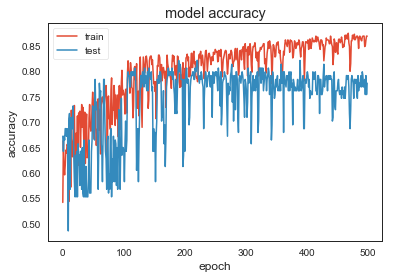

In [51]:
# # summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [36]:
def hyperopt_gb_score(params):
    clf = GradientBoostingClassifier(**params)
    current_score = cross_val_score(clf, train, target, cv=10).mean()
    print(current_score, params)
    return current_score 
 
space_gb = {
            'n_estimators': 500,
            'max_depth': 5           
        }

In [37]:
# Gradient Boosting Classifier

gradient_boosting = GradientBoostingClassifier()
gradient_boosting.fit(train1_x, train1_y)
Y_pred = gradient_boosting.predict(test1_x).astype(int)
gradient_boosting.score(train1_x, train1_y)
acc_gradient_boosting = round(gradient_boosting.score(train1_x, train1_y) * 100, 2)
acc_gradient_boosting

C:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


91.17

In [43]:
svc = SVC()
svc.fit(train1_x, train1_y)
Y_pred = svc.predict(test1_x).astype(int)
acc_svc = round(svc.score(train1_x, train1_y) * 100, 2)
acc_svc

C:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Program Files\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


90.57

In [45]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(train1_x, train1_y)
Y_pred = sgd.predict(test1_x).astype(int)
acc_sgd = round(sgd.score(train1_x, train1_y) * 100, 2)
acc_sgd

C:\Program Files\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


65.12

In [61]:
def create_exp(X, Y):
    # create model
    model = Sequential()
    model.add(Dense(200, activation='relu', input_dim=train1_x.shape[1]))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    
    gradient_boosting = GradientBoostingClassifier()
    # Compile model
    model.compile(optimizer = gradient_boosting.fit(X, Y),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    #nadam
    #test
    #history= model.fit(X, Y,verbose=2,shuffle=True,nb_epoch=num_epochs,batch_size=num_batch,validation_split=0.2)
    
    #Y_pred = gradient_boosting.predict(X).astype(int)
    #test_error_rate = model.evaluate(test1_x, Y_pred, verbose=2)
    
    return model

In [62]:
#history= model.fit(train1_x, train1_y,verbose=2,shuffle=True,nb_epoch=num_epochs,batch_size=num_batch,validation_split=0.2)
#gradient_boosting.fit(train1_x, train1_y)
model= create_exp(train1_x, train1_y)
model.summary()

C:\Program Files\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: ('Could not interpret optimizer identifier:', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False))